<a href="https://colab.research.google.com/github/diamantidisgeorgios/exercise1/blob/main/Askisi_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Logistic Regression**

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Describe Features

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plot Variables

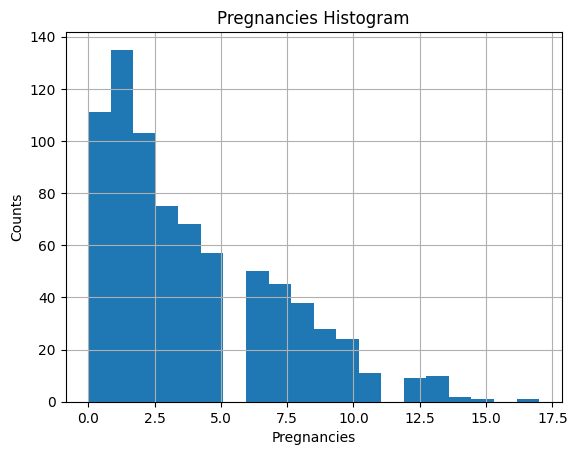

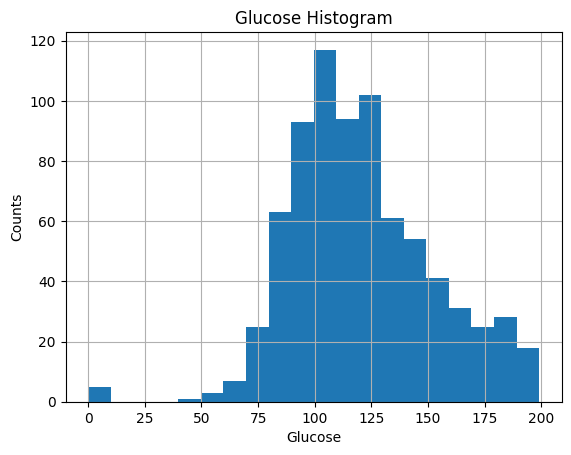

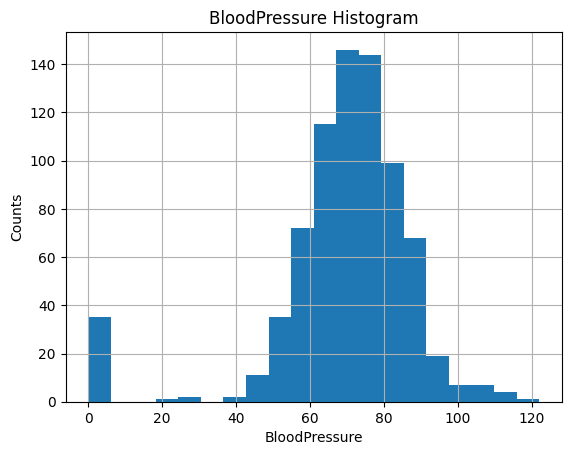

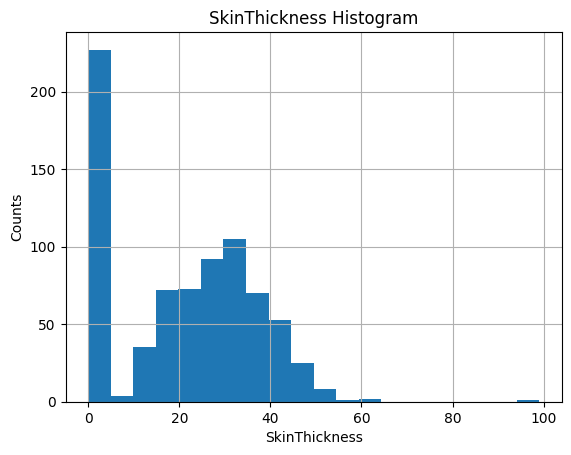

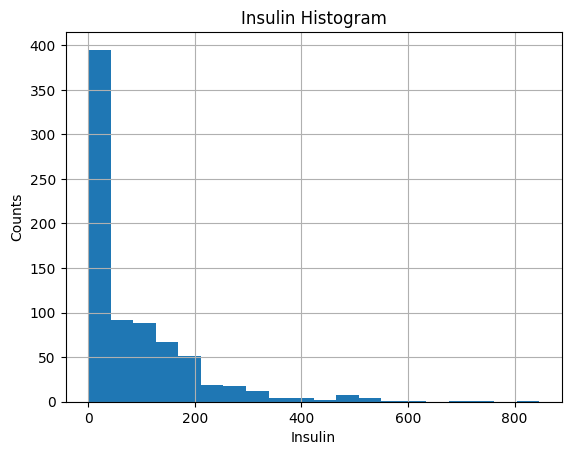

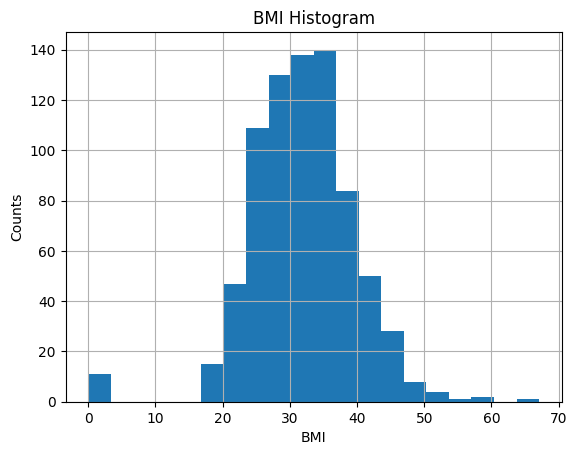

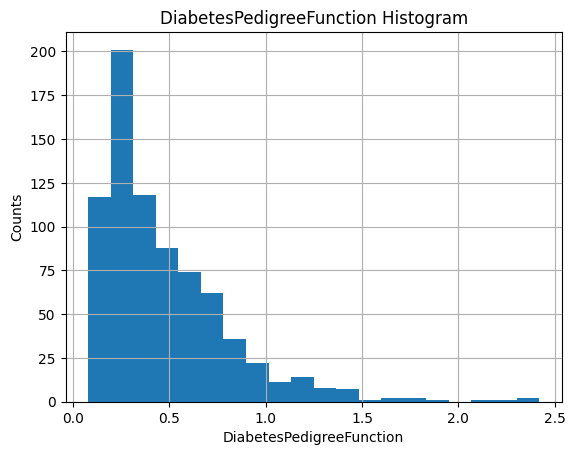

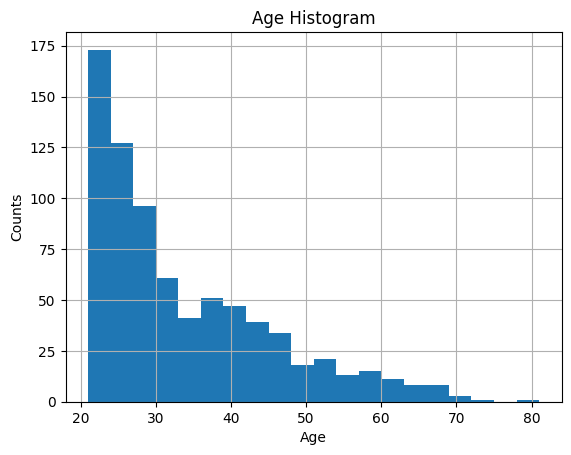

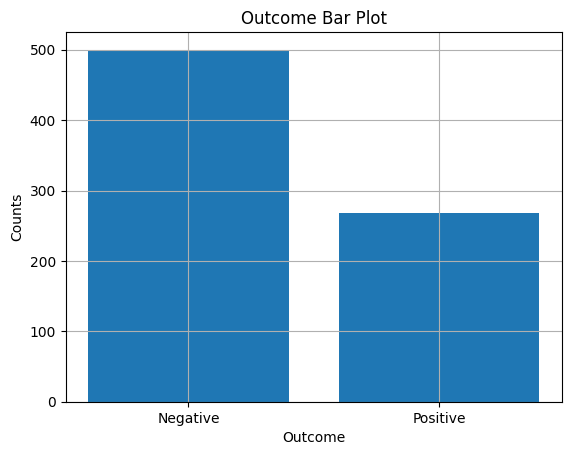

In [69]:
#Plot features histogram
for i in df.columns.drop('Outcome'):
  plt.hist(df[i], bins=20)
  plt.title(f'{i} Histogram')
  plt.xlabel(f'{i}')
  plt.ylabel('Counts')
  plt.grid()
  plt.show()

#Plot outcome bar plot
plt.bar(['Negative', 'Positive'], df.Outcome.value_counts(), data=df['Outcome'])
plt.title('Outcome Bar Plot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.grid()
plt.show()

# Comment on Dataset

### Σχόλιο για την ερώτηση 2
Η ποιότητα των δεδομένων είναι κακή γιατί μέσα από την περιγραφή του κάθε χαρακτηριστικού(df.describe()) και από τα ιστογράμματα φαίνεται ότι η ελάχιστη τιμή στα περισσότερα χαρακτηριστικά είναι 0, ενώ στη πραγματικότητα αυτό είναι αδύνατο (εκτός από τον αριθμό των εγκυμοσύνων). Για παράδειγμα ένας ασθενής δεν μπορεί να έχει μηδενική αρτηριακή πίεση ή μηδενικό πάχος δέρματος στους τρικέφαλους. Ένας άλλος λόγος που η ποιότητα είναι κακή, είναι η ανισορροπία των κλάσεων. Ένα μοντέλο που έχει εκπαιδευτεί με αυτά τα δεδομένα δεν θα είναι τόσο αποδοτικό μιας και θα δείχνει προτίμηση ως προς τη μία κλάση.

### Σχόλιο για την ερώτηση 3
Η κατανομή που ακολουθεί η μεταβλητή Age είναι εκθετική. Μια τέτοια κατανομή δεν είναι καλή για τη συγκεκριμένη εφαρμογή γιατί υπάρχει υπερεκπροσώπηση στα άτομα μικρότερης ηλικίας σε σχέση με τα μεγαλύτερης. Έτσι, οι προβλέψεις των ασθενών μεγαλύτερης ηλικίας θα είναι αναξιόπιστες μιας και δεν υπήρχουν αρκετά δεδομένα ατόμων τέτοιας ηλικίας κατά την εκπαίδευση του μοντέλου.

# Show correlation between high glucose levels and diabetes

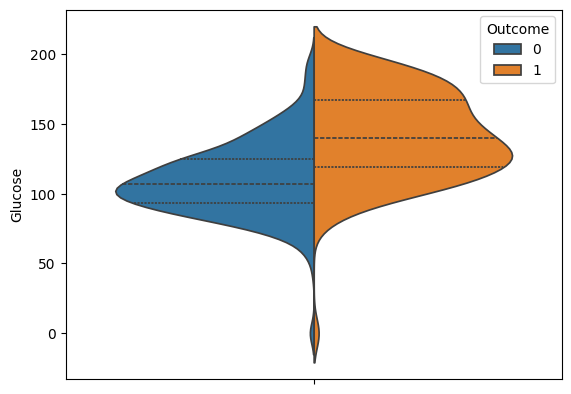

In [70]:
sns.violinplot(df, y='Glucose', split=True, hue='Outcome', inner="quart")
plt.show()

Από το παραπάνω γράφημα φαίνεται ότι οι ασθενείς που έχουν διαγνστει με διαβήτη (Outcome: 1) έχουν μεγαλύτερη συγκέντωση γλυκόζης. Πιο συγκεκριμένα, φαίνεται οτι η διάμεσος της συγκέντωσης γλυκόζης των ασθενών με διαβήτη είναι υψηλότερη από αυτόυς που δεν έχουν διαγνωσθεί με διαβήτη(Outcome: 0)

# Convert DataFrame to Numpy arrays

In [72]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

Train Samples: 537
Test Samples: 231

In [7]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

# Plot the number of samples per set

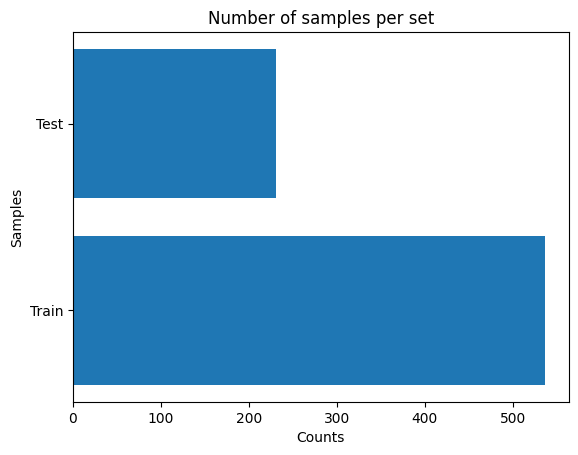

In [8]:
plt.barh(['Train', 'Test'], [x_train.shape[0], x_test.shape[0]])
plt.title('Number of samples per set')
plt.xlabel('Counts')
plt.ylabel('Samples')
plt.show()

# Create a Logistic Regression Model

In [9]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# Train model on training set

In [10]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Evaluate Model on test and train set

### Prediction on the test set

In [11]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [12]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model on the test set is: {accuracy_percentage}')

The accuracy of the model on the test set is: 77.92


### Prediction on the train set

In [13]:
y_pred = model.predict(x_train)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [14]:
accuracy = accuracy_score(y_train, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model on the train set is: {accuracy_percentage}')

The accuracy of the model on the train set is: 76.54


# Comment on the accuracy of test and train set

Παρατηρείται ότι η ακρίβεια του test set με του train set δεν έχει κάποια αξιοσημείωτη διαφορά. Αυτό σημαίνει ότι το μοντέλο έχει γενικευτεί και παρέχει παρόμοια ακρίβεια σε δεδομένα που δεν έχει ξαναδεί.

# Evaluate the accuracy on the test test on different age brackets




In [15]:
input_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

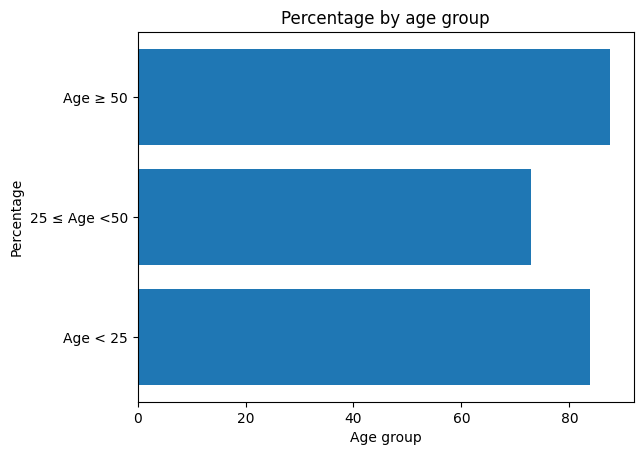

In [16]:
# Create masks that filters patients with age < 25, age >= 50,  25 <= age<50. Age is found at x_test[:, 7]
age_index = 7
mask_25 = x_test[:, age_index] < 25
mask_50 = x_test[:, age_index] >= 50
mask_25_50 = (~mask_25) & (~mask_50)

# Get age < 25 percentage
x_test_25= x_test[mask_25]
y_test_25 = y_test[mask_25]
y_pred_25 = model.predict(x_test_25)
accuracy_25 = accuracy_score(y_test_25, y_pred_25)
accuracy_percentage_25 = round(accuracy_25*100, 2)

# Get age 25 <= age < 50 percentage
x_test_25_50= x_test[mask_25_50]
y_test_25_50 = y_test[mask_25_50]
y_pred_25_50 = model.predict(x_test_25_50)
accuracy_25_50 = accuracy_score(y_test_25_50, y_pred_25_50)
accuracy_percentage_25_50 = round(accuracy_25_50*100, 2)

# Get age age >= 50 percentage
x_test_50= x_test[mask_50]
y_test_50 = y_test[mask_50]
y_pred_50 = model.predict(x_test_50)
accuracy_50 = accuracy_score(y_test_50, y_pred_50)
accuracy_percentage_50 = round(accuracy_50*100, 2)

#Plot outcome bar plot
plt.barh(['Age < 25', '25 ≤ Age <50', 'Age ≥ 50'], [accuracy_percentage_25, accuracy_percentage_25_50, accuracy_percentage_50])
plt.title('Percentage by age group')
plt.xlabel('Age group')
plt.ylabel('Percentage')
plt.show()



# Comment on the accuracy of every age group

Μέσα από το ραβδόγραμμα φαίνεται ότι το κάθε διαφορετικό ηλικιακό γκρουπ έχει και διαφορετική ακρίβεια. Οι ασθενείς κάτω από 25 χρονών αλλά και οι ασθενείς πάνω από 50 χρονών έχουν ποσοστό ακρίβειας πάνω από 80%, ενώ οι ασθενείς από 25 χρονών ως 50 έχουν ποσοστό ακρίβειας πάνω από 70%. Παρατηρείται ότι με βάση αυτά που αναφέρθηκαν στο ερώτημα 3, τα αποτελέσματα είναι αντιφατικά γιατί θα έπρεπε το χαμηλότερο ποσοστό της ακρίβειας να είναι στις ηλικίες άνω των 50. Αυτό θα μπορούσε να οφείλεται σε αρκετά πράγματα όπως η κακή ποιότητα των δεδομένων, συγκεκριμένα στις μικρότερες ηλικίες, ή και ακόμα στο τυχαίο διαχωρισμό που έχει ορισθεί με τη μεταβλητή seed. Τα αίτια αξίζουν να διερευνηθούν περισσότερο αλλά είναι εκτός του σκοπού αυτής της εργασίας.

# Comment about the false positives and false negatives

Το μοντέλο που έχει δημιουργηθεί μπορεί να κάνει δύο κατηγορίες λαθών στις προβλέψεις. Η πρώτη κατηγορία είναι η πρόβλεψη του ενός ασθενή να πάσχει από διαβήτη ενώ στη πραγματικότητα δεν έχει και η δεύτερη κατηγορία είναι το αντίθετο, δηλαδή, η πρόβλεψη ενός ασθενή να μην πάσχει από διαβήτη αλλά στη πραγματικότητα να έχει. Από αυτές τις δύο κατηγορίες η δεύτερη είναι χειρότερη γιατί εάν δεν αντιμετωπιστεί έγκαιρα αυτή η ασθένεια, τότε ο ασθενής μπορεί να πέσει σε διαβητικό κώμα ή και να πεθάνει, ενώ στη πρώτη κατηγορία το λάθος της πρόβλεψης θα φέρει στον ασθενή ψυχικό στρες αλλά δεν θα κινδυνεύσει η ζωή του.

# Split and fit the model on 10 different seeds

In [17]:

accuracies_test=[]
accuracies_train=[]
start_seed=0
end_seed=9
test_size = 0.3
for i in range(start_seed, end_seed+1):
  #split data into train set and test set
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=i)

  #fit model and get the accuracy of the test set
  model = LogisticRegression(max_iter=1000, random_state=i)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies_test.append(round(accuracy*100, 2))

  #fit model and get the accuracy of the train set
  model = LogisticRegression(max_iter=1000, random_state=i)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_train)
  accuracy = accuracy_score(y_train, y_pred)
  accuracies_train.append(round(accuracy*100, 2))

# Get the mean and the standard deviation of the 10 previous runs

In [18]:
mean_test = np.mean(accuracies_test)
std_test = np.std(accuracies_test)

print(f'The mean of accuracies on the test set is: {mean_test} and the standard deviation is: {std_test}')

mean_train = np.mean(accuracies_train)
std_train = np.std(accuracies_train)

print(f'The mean of accuracies on the train set is: {mean_train} and the standard deviation is: {std_train}')


The mean of accuracies on the test set is: 77.27 and the standard deviation is: 1.8689087725194093
The mean of accuracies on the train set is: 77.65299999999999 and the standard deviation is: 1.2132934517255065


# Feature Importance

The larger the absolute weight value, the better

In [73]:
test_size = 0.3
seed = 0

#normalizing features
normalized_x = MinMaxScaler().fit_transform(x)

#split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(normalized_x , y, test_size=test_size, random_state=seed)

#fit model
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

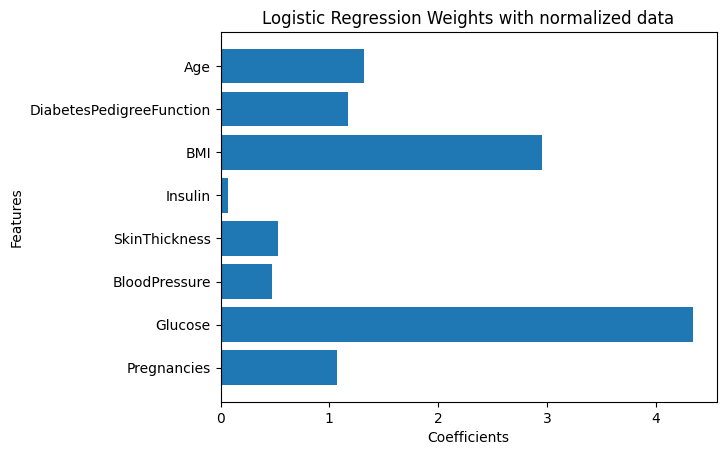

In [20]:
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights with normalized data')
plt.ylabel('Features')
plt.xlabel('Coefficients')
plt.show()

# Comment on the feature importance

Μέσα από το γράφημα που έχει δημιουργηθεί, φαίνεται από τα βάρη (όσο πιο μεγάλη η απόλυτη τιμή του βάρους, τόσο πιο σημαντικό είναι το χαρακτηριστικό) ότι οι 3 πιο σημαντική παράγοντες που επηρεάζουν τη πρόβλεψή του διαβήτη είναι η συγκέντρωση της γλυκόζης στο αίμα(glucose), ο δείκτης μάζας-σώματος(BMI) και η ηλικία(Age).

# **Part 2: Linear Regression**

# Load Dataset

In [21]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Convert DataFrame to Numpy arrays

In [22]:
input_df = df.drop(columns=['Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome'])
targets_df = df['Glucose']

x = input_df.to_numpy()
y = targets_df.to_numpy()

# Split Dataset to Train-Test

Train Samples: 537
Test Samples: 231

In [32]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

# Create a Logistic Regression Model

In [33]:
model = LinearRegression()

# Train model on training set

In [36]:
model.fit(x_train, y_train)

LinearRegression()

# Evaluate Model

In [35]:
y_pred = model.predict(x_test)

In [38]:
MSE = round(mean_squared_error(y_test, y_pred), 3)
MAE = round(mean_absolute_error(y_test, y_pred), 3)

MSE, MAE

(930.404, 23.588)

# Comment about MSE and MAE

Σε αυτή την εφαρμογή με αυτό το συγκεκριμένο dataset η καταλληλότερη μετρική είναι η Mean Absolute Error γιατί στα χαρακτηριστικά BloodPressure και BMI υπάρχουν πολλές ακραίες τιμές(outliers), όπου η Mean Squared Error θα δώσει μια διαστρεβλωμένη εικόνα μιας και είναι ευαίσθητη στις ακραίες τιμές γιατί τετραγωνίζει το σφάλμα. Ένας άλλος λόγος που είναι καταλληλότερη η MAE σε αυτή τη περίπτωση είναι η ευαναγνωσία της. Στο αποτέλεσμα που βρέθηκε φαίνεται εύκολα ότι το μέσο σφάλμα στη πρόβλεψη της συγκέντρωσης γλυκόζης είναι ± 23.588.

# Create, Train and Evalute Lasso Regression Model

In [66]:
alphas = [0.2, 0.4, 0.6, 0.8, 1]

print(f'     |  MAE  |  MSE  |')
print(f'     -----------------')

for alpha in alphas:
  #Create model
  model = Lasso(alpha=alpha)

  #Train model
  model.fit(x_train, y_train)

  #Evaluate model
  y_pred = model.predict(x_test)

  print(f'{alpha:>5}|{round(mean_absolute_error(y_test, y_pred), 3) :<7}|{round(mean_squared_error(y_test, y_pred), 3) :<7}|')


     |  MAE  |  MSE  |
     -----------------
  0.2|23.584 |930.173|
  0.4|23.58  |929.944|
  0.6|23.576 |929.717|
  0.8|23.572 |929.491|
    1|23.569 |929.267|


# Normalize data and train Linear Regression Model

In [26]:
test_size =0.3
seed = 0

#normalizing features
normalized_x = MinMaxScaler().fit_transform(x)

#split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(normalized_x , y, test_size=test_size, random_state=seed)

#fit model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Feature Importance

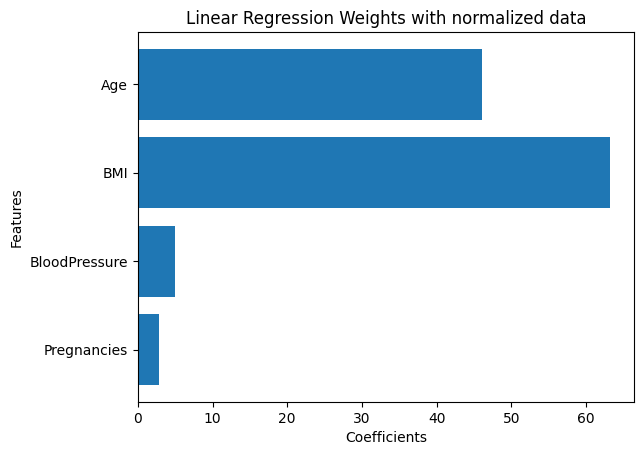

In [27]:
coeffs = model.coef_
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Linear Regression Weights with normalized data')
plt.ylabel('Features')
plt.xlabel('Coefficients')
plt.show()

# Remove least important feature

In [28]:
input_df = df.drop(columns=['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome'])
targets_df = df['Glucose']

x = input_df.to_numpy()
y = targets_df.to_numpy()

# Split data and train without the least important feature

In [67]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Evaluate Model

In [68]:
y_pred = model.predict(x_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

MSE, MAE

(930.4043043140708, 23.58760313474184)